# *Assignmenet 1*

## Importing Libararies and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import matplotlib as mlt

In [2]:
# IMPORT DATASET

cars = pd.read_csv(r'D:\Machine Learning\data\cars_price.csv')

In [3]:
print(cars.shape)
cars.head()

(40000, 13)


,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


## Data Cleaning

In [4]:
#COUNTING NULL VALUES IN EACH COLUMN

nanVal = pd.isnull(cars)

nanVal.sum()

Unnamed: 0                0
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

" Clearly we had some NULL values in Volume, drive_unit and segment "

In [5]:
cars.columns

Index(['Unnamed: 0', 'make', 'model', 'priceUSD', 'year', 'condition',
       'mileage(kilometers)', 'fuel_type', 'volume(cm3)', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')

In [6]:
# Putting PriceUSD column at last for convenience 

df1 = cars.pop('priceUSD')
cars['price'] = df1

# DROPPING FIRST COLUMN AS IT IS UNNECESSARY 
cars.pop('Unnamed: 0')
cars.head()

,make,model,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,price
0,honda,accord,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,565
1,ford,fusion,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,5550
2,nissan,teana,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,8300
3,volkswagen,fox,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,3300
4,nissan,primera,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,2450


In [7]:
cars.describe()

,year,mileage(kilometers),volume(cm3),price
count,40000.000000,4.000000e+04,39970.000000,40000.000000
mean,2003.485625,2.434332e+05,2103.201676,7430.383775
std,8.114896,3.167033e+05,938.724653,8338.242134
min,1938.000000,0.000000e+00,500.000000,95.000000
25%,1998.000000,1.370000e+05,1600.000000,2350.000000
50%,2004.000000,2.280000e+05,1995.000000,5350.000000
75%,2010.000000,3.087610e+05,2300.000000,9850.000000
max,2019.000000,9.999999e+06,20000.000000,195000.000000


Average price is 7430.40 dollars here

### Now let's fill the Null Values wherever needed

In [8]:
# FOR drive_unit COLUMN

cars['drive_unit'].value_counts()

front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64

### Here drive_unit column has "front-wheel" label as most so we can use it to fill NaN values

In [9]:
cars['drive_unit'].fillna('front-wheel drive',inplace=True)

In [10]:
# FOR segment COLUMN

cars['segment'].value_counts().sum()

36245

### We will here fill Null values with most occuring values that are D, C, J, M, E and B

In [11]:
cars['segment'].fillna('A', inplace =True)

cars.drop(cars[(cars['segment'] != 'D') & (cars['segment'] != 'A') & (cars['segment'] != 'C') & (cars['segment'] != 'J') & (cars['segment'] != 'M') & (cars['segment'] != 'E') & (cars['segment'] != 'B') & (cars['segment'] != 'F') & (cars['segment'] != 'S')].index, inplace=True)

cars

,make,model,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,price
0,honda,accord,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,565
1,ford,fusion,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,5550
2,nissan,teana,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,8300
3,volkswagen,fox,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,3300
4,nissan,primera,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,2450
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J,12500
39996,peugeot,607,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E,4754
39997,mercedes-benz,c-klass,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D,4000
39998,proton,persona,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,A,1200


In [12]:
# FOR volume Column

VolMean = cars['volume(cm3)'].mean()

### Here we will use mean of volume to fill null values

In [13]:
cars['volume(cm3)'].fillna(VolMean,inplace=True)

In [14]:
pd.isnull(cars).sum()

make                   0
model                  0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
price                  0
dtype: int64

### Now we have no Null Values in our Dataset

## Now we will use Label Encoding to change strings into numbers for further numerical analysis

In [15]:
# IMPORTING LABEL ENCODER FROM SKLEARN

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
cars.dropna(how='any',axis=0,inplace=True)

In [17]:
cars['make'] = encoder.fit_transform(cars['make'])
cars['model'] = encoder.fit_transform(cars['model'])
cars['condition'] = encoder.fit_transform(cars['condition'])
cars['color'] = encoder.fit_transform(cars['color'])
cars['fuel_type'] = encoder.fit_transform(cars['fuel_type'])
cars['transmission'] = encoder.fit_transform(cars['transmission'])
cars['drive_unit'] = encoder.fit_transform(cars['drive_unit'])
cars['segment'] = encoder.fit_transform(cars['segment'])


cars['mileage(kilometers)'] = cars['mileage(kilometers)']/max(cars['mileage(kilometers)'])
cars['volume(cm3)'] = cars['mileage(kilometers)']/max(cars['volume(cm3)'])

In [18]:
cars.corr().style.background_gradient(cmap='PuBu').set_precision(2)

,make,model,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,price
make,1.00,0.28,0.04,0.01,-0.01,-0.07,-0.01,0.05,0.13,-0.13,-0.01,-0.03
model,0.28,1.00,0.16,0.01,-0.02,-0.10,-0.02,-0.00,-0.06,-0.19,0.18,0.14
year,0.04,0.16,1.00,0.13,-0.24,-0.07,-0.24,-0.06,-0.40,-0.20,0.10,0.61
condition,0.01,0.01,0.13,1.00,-0.04,-0.03,-0.04,-0.01,-0.06,-0.01,0.06,0.09
mileage(kilometers),-0.01,-0.02,-0.24,-0.04,1.00,-0.09,1.00,0.02,0.11,0.05,0.02,-0.17
fuel_type,-0.07,-0.10,-0.07,-0.03,-0.09,1.00,-0.09,0.00,-0.10,-0.02,-0.22,-0.10
volume(cm3),-0.01,-0.02,-0.24,-0.04,1.00,-0.09,1.00,0.02,0.11,0.05,0.02,-0.17
color,0.05,-0.00,-0.06,-0.01,0.02,0.00,0.02,1.00,0.10,-0.02,-0.06,-0.10
transmission,0.13,-0.06,-0.40,-0.06,0.11,-0.10,0.11,0.10,1.00,0.02,-0.18,-0.45
drive_unit,-0.13,-0.19,-0.20,-0.01,0.05,-0.02,0.05,-0.02,0.02,1.00,-0.02,-0.13


### here correlation of different features is showed and dark colors show high correlation
### Clearly price highly positive related to 'Year' and 'model' and highly negative related to 'transmission' , 'volume' and 'mileage'

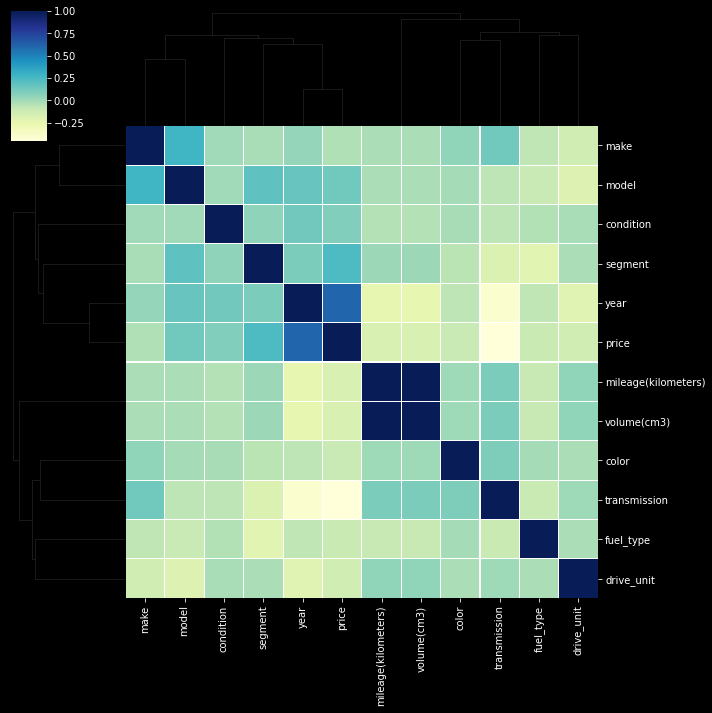

In [19]:
corrmat = cars.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

## A better visualization of our analysis !!

## Let's see trend of price with different features

<AxesSubplot:xlabel='year', ylabel='price'>

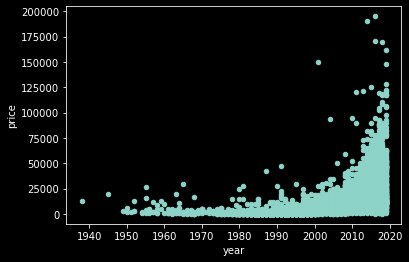

In [20]:
gp1 = cars[['year','price']]
gp1.plot(x='year',y='price',kind='scatter')

### This shows that price of a car has increased exponentially with year passed

<AxesSubplot:xlabel='volume(cm3)', ylabel='price'>

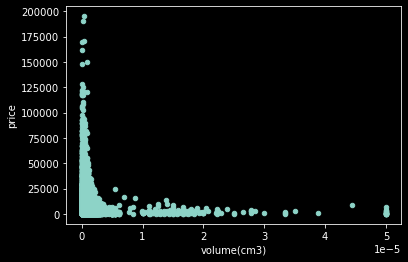

In [21]:
gp2 = cars[['volume(cm3)','price']]
gp2.plot(x='volume(cm3)',y='price',kind='scatter')

### This shows that less volume cars tend to have much more price

<AxesSubplot:xlabel='mileage(kilometers)', ylabel='price'>

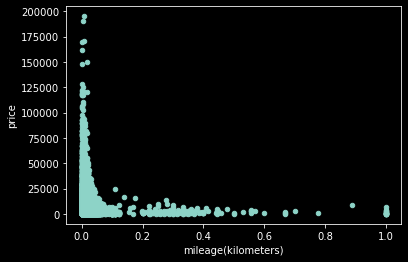

In [22]:
gp1 = cars[['mileage(kilometers)','price']]
gp1.plot(x='mileage(kilometers)',y='price',kind='scatter')

### This clearly indicates that less mileage cars are more costly

## Let's check out some stats ;-)

In [23]:
# student's t-test
!pip install bioinfokit

## Test reagrding year and price

### student's T-test

In [24]:
from bioinfokit.analys import stat,ttsam

res = stat()
res.ttest( df=cars[['year','price']], xfac= 'year', res=['year','price'], test_type=3, mu=7430 )
print(res.summary)


Paired t-test 

------------------  ---------
Sample size         40000
Difference Mean     -5426.9
t                    -130.246
Df                  39999
P-value (one-tail)      0
P-value (two-tail)      0
Lower 95.0%         -5508.57
Upper 95.0%         -5345.23
------------------  ---------


### chi square test

In [25]:
res2 = stat()
res2.chisq(df=cars[['year','price']])
print(res2.summary)


Chi-squared test for independence

Test               Df    Chi-square    P-value
--------------  -----  ------------  ---------
Pearson         39999   5.64771e+07          0
Log-likelihood  39999   5.24724e+07          0



C:\Users\Divyansh Tiwari\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


<AxesSubplot:xlabel='segment', ylabel='price'>

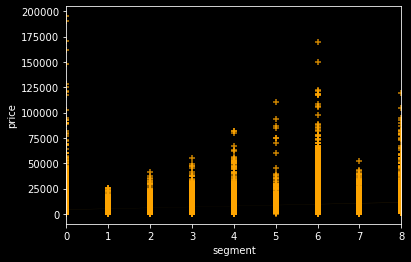

In [26]:
sns.regplot(data=cars,x='segment',y='price',color='orange',marker='+')

## We see here that segment encoded as 6 having high price of car

## This ends my internship challenge and i hope you like it. I will do much better if i get opportunity.

# Divyansh Tiwari
# Mechademy Internship Challenge